# Text_mining
IT Academy T7.1

Exercicis d'anàlisi de sentiment i textos.


## Objectius
1. Realitzar mineria de texts.
2. Interpretació dels textos.
3. Anàlisis dels resultats.

# Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


Analitzarem un monòlog dels incommensurables Monty Python, The Logician.

Fonts:

https://montycasinos.com/montypython/scripts/logician.php.html

https://www.youtube.com/watch?v=FZqs36C5sgM

In [3]:
# Carreguem llibreries bàsiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
with open('monty-python-logician-monologue.txt', 'r', encoding='utf-8') as file:
    text = file.read()
print(text)

Monty Python's The Logician.

Good evening. The last scene was interesting from the point of view of a professional logician because it contained a number of logical fallacies; that is, invalid propositional constructions and syllogistic forms, of the type so often committed by my wife.

'All wood burns,' states Sir Bedevere. 'Therefore,' he concludes, 'all that burns is wood.' This is, of course, pure bullshit. Universal affirmatives can only be partially converted: all of Alma Cogan is dead, but only some of the class of dead people are Alma Cogan. 'Oh yes,' one would think. However, my wife does not understand this necessary limitation of the conversion of a proposition; consequently, she does not understand me, for how can a woman expect to appreciate a professor of logic, if the simplest cloth-eared syllogism causes her to flounder?

For example, given the premise, 'all fish live underwater' and 'all mackerel are fish', my wife will conclude, not that 'all mackerel live underwater

In [39]:
# 'Democratitzem' les paraules posant-les en minúsucla
lower_text = text.lower()
print(lower_text)

monty python's the logician.

good evening. the last scene was interesting from the point of view of a professional logician because it contained a number of logical fallacies; that is, invalid propositional constructions and syllogistic forms, of the type so often committed by my wife.

'all wood burns,' states sir bedevere. 'therefore,' he concludes, 'all that burns is wood.' this is, of course, pure bullshit. universal affirmatives can only be partially converted: all of alma cogan is dead, but only some of the class of dead people are alma cogan. 'oh yes,' one would think. however, my wife does not understand this necessary limitation of the conversion of a proposition; consequently, she does not understand me, for how can a woman expect to appreciate a professor of logic, if the simplest cloth-eared syllogism causes her to flounder?

for example, given the premise, 'all fish live underwater' and 'all mackerel are fish', my wife will conclude, not that 'all mackerel live underwater

Un cop tenim les paraules en minúscules, procedim a separar-les mitjançant la tokenització.

La tokenització és la tasca de descompondre un text en unitats més petites, com paraules o símbols, per a facilitar-ne l'anàlisi i processament en tasques de processament del llenguatge natural.

Farem servir NLTK (Natural Language Toolkit), una llibreria de programació dissenyada específicament per a tasques de processament del llenguatge natural (PLN).

Font: https://medium.com/datos-y-ciencia/preprocesamiento-de-datos-de-texto-un-tutorial-en-python-5db5620f1767

In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/eda/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
words = nltk.word_tokenize(lower_text)
print(words)

['monty', 'python', "'s", 'the', 'logician', '.', 'good', 'evening', '.', 'the', 'last', 'scene', 'was', 'interesting', 'from', 'the', 'point', 'of', 'view', 'of', 'a', 'professional', 'logician', 'because', 'it', 'contained', 'a', 'number', 'of', 'logical', 'fallacies', ';', 'that', 'is', ',', 'invalid', 'propositional', 'constructions', 'and', 'syllogistic', 'forms', ',', 'of', 'the', 'type', 'so', 'often', 'committed', 'by', 'my', 'wife', '.', "'all", 'wood', 'burns', ',', "'", 'states', 'sir', 'bedevere', '.', "'therefore", ',', "'", 'he', 'concludes', ',', "'all", 'that', 'burns', 'is', 'wood', '.', "'", 'this', 'is', ',', 'of', 'course', ',', 'pure', 'bullshit', '.', 'universal', 'affirmatives', 'can', 'only', 'be', 'partially', 'converted', ':', 'all', 'of', 'alma', 'cogan', 'is', 'dead', ',', 'but', 'only', 'some', 'of', 'the', 'class', 'of', 'dead', 'people', 'are', 'alma', 'cogan', '.', "'oh", 'yes', ',', "'", 'one', 'would', 'think', '.', 'however', ',', 'my', 'wife', 'does'

També ha tokenitzar els signes de puntuació. Procedim a eliminar-los.

In [41]:
from nltk.tokenize import RegexpTokenizer

# Excloure els signes de puntuació
tokenizer = RegexpTokenizer(r'\w+')

# Tokenitzar sense signes de puntació
words = tokenizer.tokenize(lower_text)

print(words)

['monty', 'python', 's', 'the', 'logician', 'good', 'evening', 'the', 'last', 'scene', 'was', 'interesting', 'from', 'the', 'point', 'of', 'view', 'of', 'a', 'professional', 'logician', 'because', 'it', 'contained', 'a', 'number', 'of', 'logical', 'fallacies', 'that', 'is', 'invalid', 'propositional', 'constructions', 'and', 'syllogistic', 'forms', 'of', 'the', 'type', 'so', 'often', 'committed', 'by', 'my', 'wife', 'all', 'wood', 'burns', 'states', 'sir', 'bedevere', 'therefore', 'he', 'concludes', 'all', 'that', 'burns', 'is', 'wood', 'this', 'is', 'of', 'course', 'pure', 'bullshit', 'universal', 'affirmatives', 'can', 'only', 'be', 'partially', 'converted', 'all', 'of', 'alma', 'cogan', 'is', 'dead', 'but', 'only', 'some', 'of', 'the', 'class', 'of', 'dead', 'people', 'are', 'alma', 'cogan', 'oh', 'yes', 'one', 'would', 'think', 'however', 'my', 'wife', 'does', 'not', 'understand', 'this', 'necessary', 'limitation', 'of', 'the', 'conversion', 'of', 'a', 'proposition', 'consequently'

A continuació, dibuixarem una gràfica amb la distribució de les paraules segons la freqüència

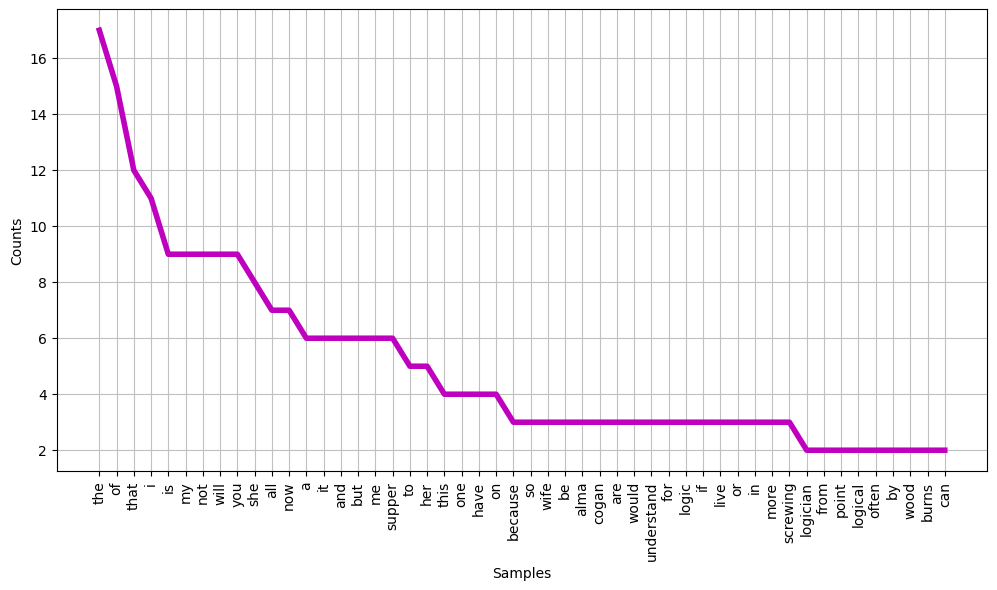

In [43]:
from nltk.probability import FreqDist

# Frequency Distribution Plot

# Calcula la freqüència de les paraules
freq_dist = FreqDist(words)

plt.figure(figsize=(12,6))
freq_dist.plot(50,cumulative=False, color = 'm', linewidth = 4)
plt.show()

Podem visuatzar la freqüència de les paraules també podem fer servir el núvol de paraules.

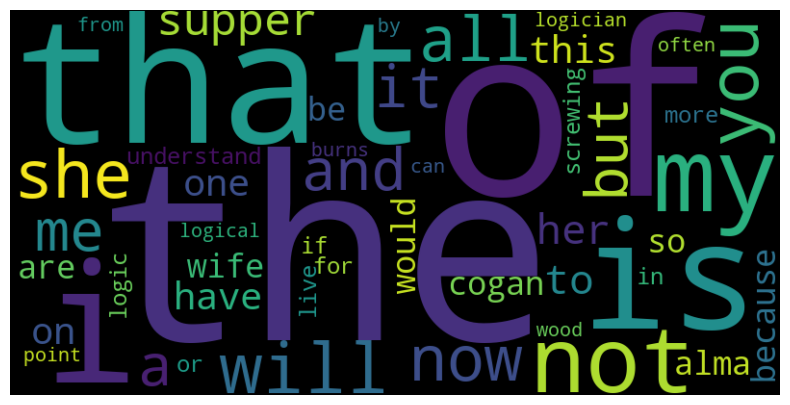

In [46]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Com era d'esperar, les paraules més comuns són les més comuns de la llengua anglesa (veure https://www.espressoenglish.net/the-100-most-common-words-in-english/), que són paraules articuladores del llenguatge i no aporten informació significativa.

Aquestes paraules, coneixides com a buides o "stopwords", sovint s'obvien en les anàlisis de text al no aportar informació extra.

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

En primer lugar, eliminarem les stopwords amb el mòdul inclòs a la llibreria NLTK.

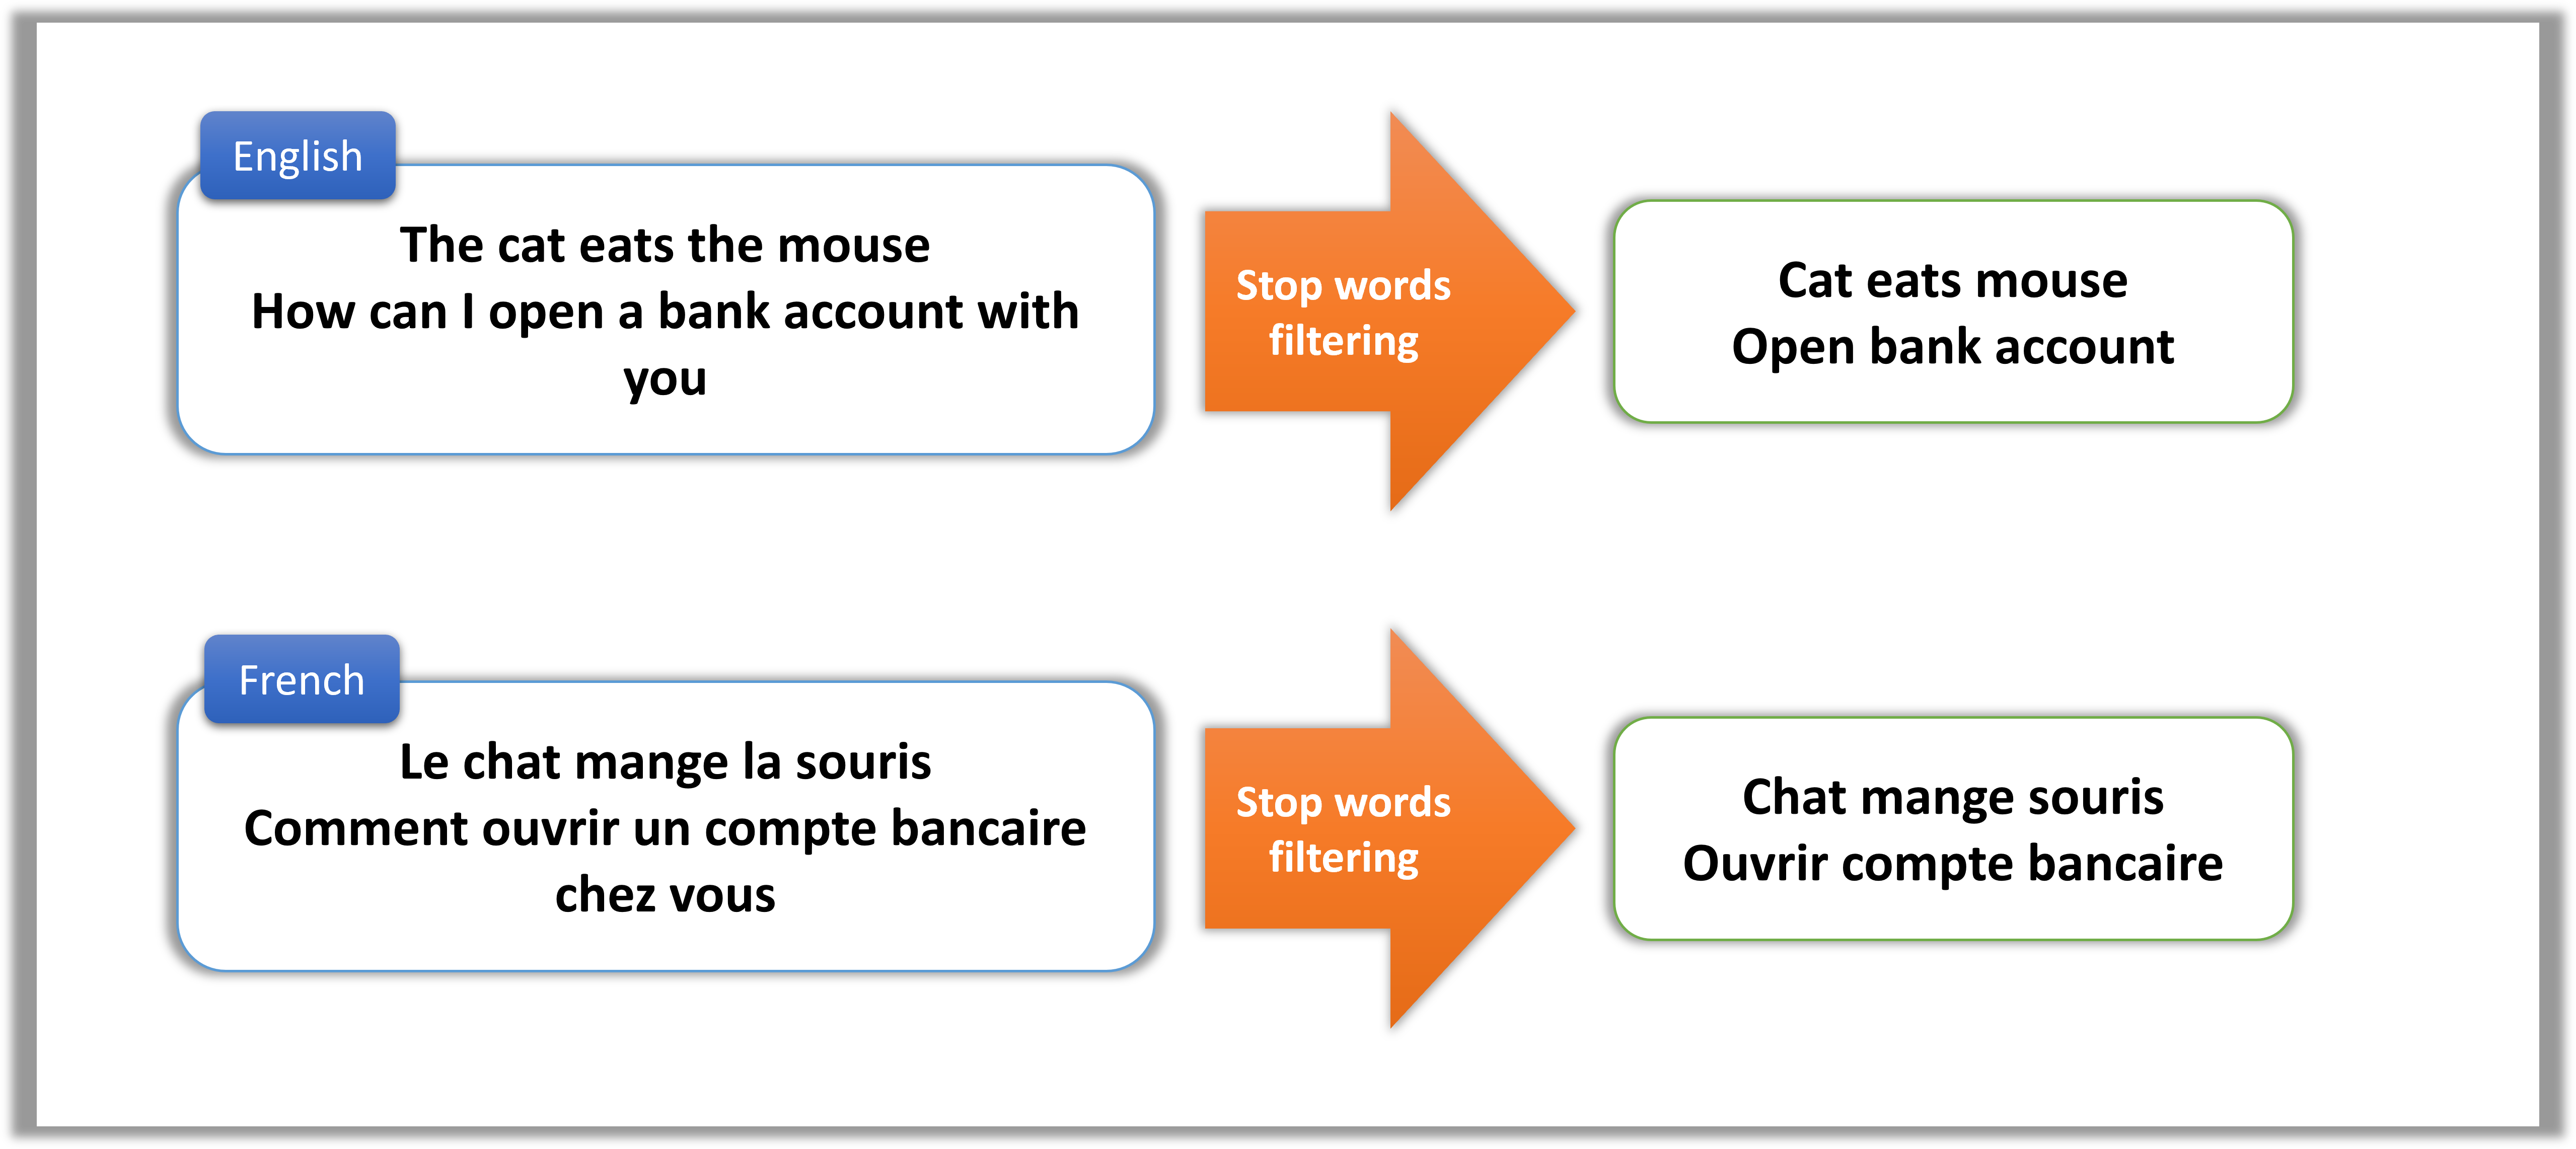


    

In [67]:
from nltk.corpus import stopwords
stopword_english = set(stopwords.words("english"))
filtered_words = []

for word in words:
    if word not in stopword_english:
        filtered_words.append(word)

print("Paraules sense stopwords:")
print(filtered_words)

Paraules sense stopwords:
['monty', 'python', 'logician', 'good', 'evening', 'last', 'scene', 'interesting', 'point', 'view', 'professional', 'logician', 'contained', 'number', 'logical', 'fallacies', 'invalid', 'propositional', 'constructions', 'syllogistic', 'forms', 'type', 'often', 'committed', 'wife', 'wood', 'burns', 'states', 'sir', 'bedevere', 'therefore', 'concludes', 'burns', 'wood', 'course', 'pure', 'bullshit', 'universal', 'affirmatives', 'partially', 'converted', 'alma', 'cogan', 'dead', 'class', 'dead', 'people', 'alma', 'cogan', 'oh', 'yes', 'one', 'would', 'think', 'however', 'wife', 'understand', 'necessary', 'limitation', 'conversion', 'proposition', 'consequently', 'understand', 'woman', 'expect', 'appreciate', 'professor', 'logic', 'simplest', 'cloth', 'eared', 'syllogism', 'causes', 'flounder', 'example', 'given', 'premise', 'fish', 'live', 'underwater', 'mackerel', 'fish', 'wife', 'conclude', 'mackerel', 'live', 'underwater', 'buys', 'kippers', 'rain', 'trout', '

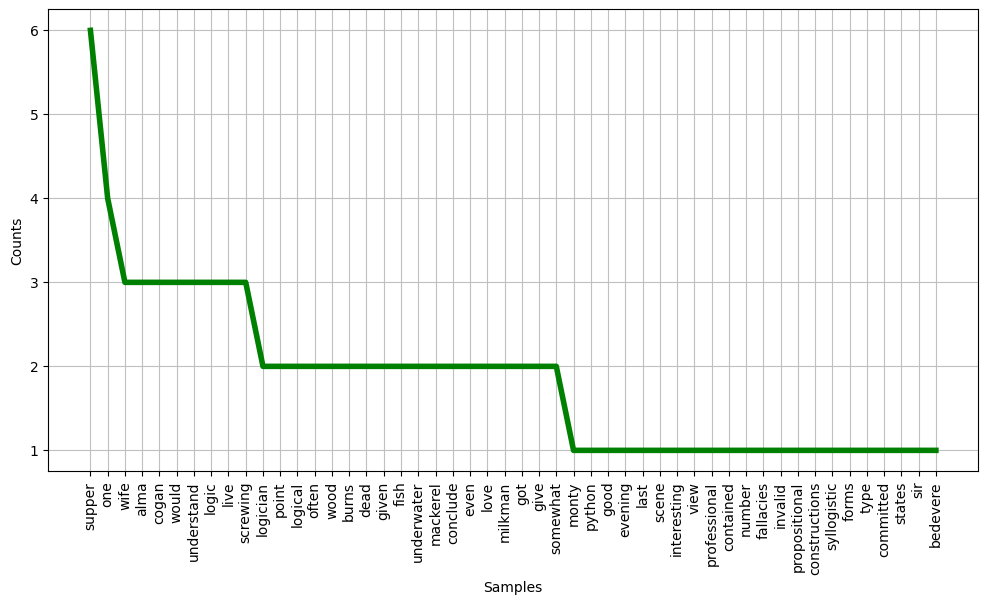

In [66]:
# Frequency Distribution Plot de les paraules filtrades

# Calcula la freqüència de les paraules
freq_dist_filt = FreqDist(filtered_words)

plt.figure(figsize=(12,6))
freq_dist_filt.plot(50,cumulative=False, color = 'g', linewidth = 4)
plt.show()

Després, reduirem les paraules a les arrels per facilitar el processat (veure projectpro.io/article/stemming-in-nlp/780).

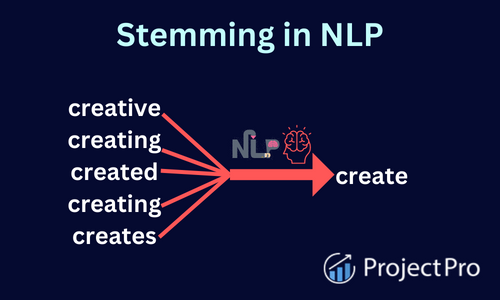

In [65]:
from nltk.stem import PorterStemmer

# Inicialitza l'objecte PorterStemmer
stemmer = PorterStemmer()

# Llista buida per guardar les paraules
stemmed_words = []

# Bucle per stemmejar les paraules
for word in filtered_words:
    stemmed_word = stemmer.stem(word)
    stemmed_words.append(stemmed_word)

print("Paraules stemmejades:")
print(stemmed_words)

Paraules stemmejades:
['monti', 'python', 'logician', 'good', 'even', 'last', 'scene', 'interest', 'point', 'view', 'profession', 'logician', 'contain', 'number', 'logic', 'fallaci', 'invalid', 'proposit', 'construct', 'syllogist', 'form', 'type', 'often', 'commit', 'wife', 'wood', 'burn', 'state', 'sir', 'bedever', 'therefor', 'conclud', 'burn', 'wood', 'cours', 'pure', 'bullshit', 'univers', 'affirm', 'partial', 'convert', 'alma', 'cogan', 'dead', 'class', 'dead', 'peopl', 'alma', 'cogan', 'oh', 'ye', 'one', 'would', 'think', 'howev', 'wife', 'understand', 'necessari', 'limit', 'convers', 'proposit', 'consequ', 'understand', 'woman', 'expect', 'appreci', 'professor', 'logic', 'simplest', 'cloth', 'ear', 'syllog', 'caus', 'flounder', 'exampl', 'given', 'premis', 'fish', 'live', 'underwat', 'mackerel', 'fish', 'wife', 'conclud', 'mackerel', 'live', 'underwat', 'buy', 'kipper', 'rain', 'trout', 'live', 'tree', 'even', 'love', 'call', 'use', 'intuit', 'call', 'crap', 'get', 'irrit', 'log

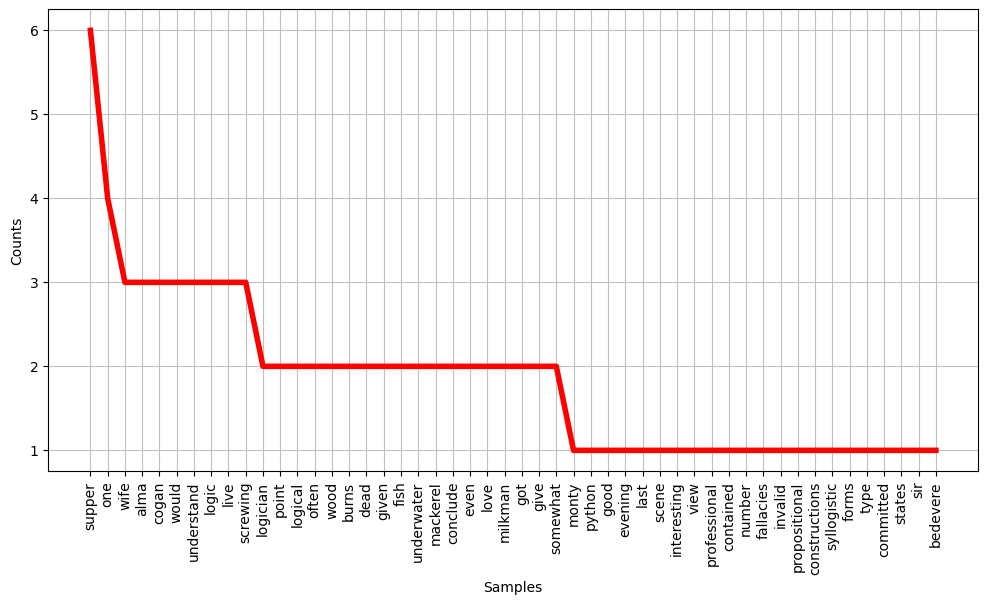

In [68]:
# Frequency Distribution Plot de les paraules filtrades

# Calcula la freqüència de les paraules
freq_dist_stem = FreqDist(stemmed_words)

plt.figure(figsize=(12,6))
freq_dist_filt.plot(50,cumulative=False, color = 'r', linewidth = 4)
plt.show()

Les paraules filtrades i les stemmejades són molt semblants. Per veure'n la diferència, farem un diagrama amb les dues llistes juntes:

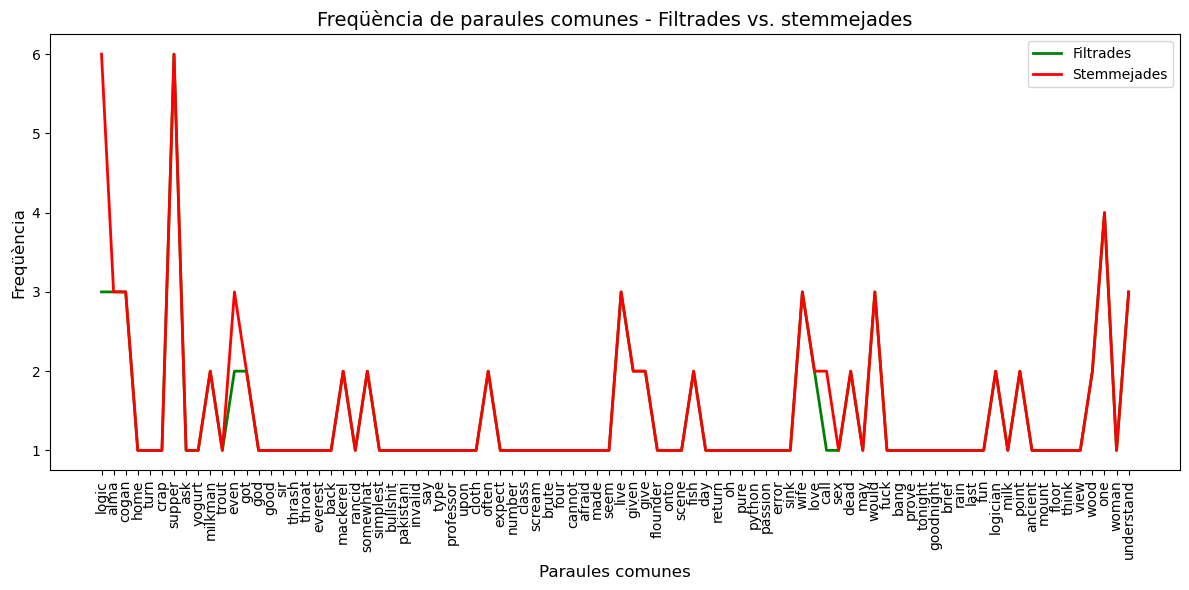

In [85]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Distribució de freqüència de les paraules filtrades
freq_dist_filt = FreqDist(filtered_words)

# Distribució de freqüència de les paraules stemmejades
freq_dist_stem = FreqDist(stemmed_words)

# Obtenir les paraules comunes a ambdues distribucions
paraules_comunes = list(set(filtered_words) & set(stemmed_words))

# Crear una figura
plt.figure(figsize=(12, 6))

# Calcular la freqüència de les paraules comunes
freq_comunes_filt = [freq_dist_filt[paraula] for paraula in paraules_comunes]
freq_comunes_stem = [freq_dist_stem[paraula] for paraula in paraules_comunes]

# Crear línies per a les paraules comunes
plt.plot(freq_comunes_filt, label='Filtrades', color='g', linewidth=2)
plt.plot(freq_comunes_stem, label='Stemmejades', color='r', linewidth=2)

# Configurar el títol i les etiquetes dels eixos
plt.title('Freqüència de paraules comunes - Filtrades vs. stemmejades', fontsize=14)
plt.xlabel('Paraules comunes', fontsize=12)
plt.ylabel('Freqüència', fontsize=12)

# Establir les paraules comunes com a etiquetes a l'eix x
plt.xticks(range(len(paraules_comunes)), paraules_comunes, rotation=90)

# Mostrar una llegenda per a les línies
plt.legend()

# Ajustar automàticament els marges per evitar que es tallin les etiquetes
plt.tight_layout()

# Mostrar el gràfic
plt.show()


Vegem com la distància entre el número de paraules comunes és minima, només algunes paraules com "logic", "even" i "call" han estat més representades un cop stemmejades. Per finalitzar, visualitzarem un núvol de paraules amb la llista stemmejada.

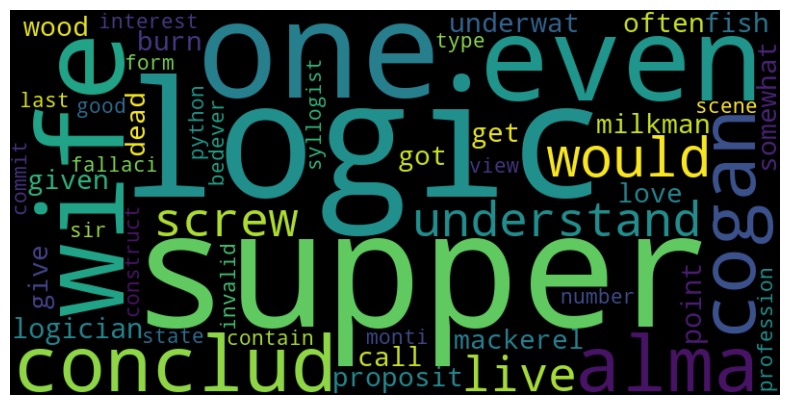

In [83]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(freq_dist_stem)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [87]:
print(stemmed_words)

['monti', 'python', 'logician', 'good', 'even', 'last', 'scene', 'interest', 'point', 'view', 'profession', 'logician', 'contain', 'number', 'logic', 'fallaci', 'invalid', 'proposit', 'construct', 'syllogist', 'form', 'type', 'often', 'commit', 'wife', 'wood', 'burn', 'state', 'sir', 'bedever', 'therefor', 'conclud', 'burn', 'wood', 'cours', 'pure', 'bullshit', 'univers', 'affirm', 'partial', 'convert', 'alma', 'cogan', 'dead', 'class', 'dead', 'peopl', 'alma', 'cogan', 'oh', 'ye', 'one', 'would', 'think', 'howev', 'wife', 'understand', 'necessari', 'limit', 'convers', 'proposit', 'consequ', 'understand', 'woman', 'expect', 'appreci', 'professor', 'logic', 'simplest', 'cloth', 'ear', 'syllog', 'caus', 'flounder', 'exampl', 'given', 'premis', 'fish', 'live', 'underwat', 'mackerel', 'fish', 'wife', 'conclud', 'mackerel', 'live', 'underwat', 'buy', 'kipper', 'rain', 'trout', 'live', 'tree', 'even', 'love', 'call', 'use', 'intuit', 'call', 'crap', 'get', 'irrit', 'logic', 'supper', 'tonigh

Per realitzar l'anàlisi de sentiment d'aquest text farem servir VADER (Valence Aware Dictionary and sEntiment Reasoner), una llibreria de processament de llenguatge natural dissenyada específicament per a l'anàlisi de sentiment. Es fa servir en textos de xarxes socials i altres textos informals, com tuits i comentaris en línia. Veurem si en aquest monòleg humorístic, un tant surrealista (o "montyphytià"), funciona.

In [90]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/eda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Crea una instància de l'analitzador de sentiment VADER
sia = SentimentIntensityAnalyzer()

# Uneix les paraules stemmed en un text
text = ' '.join(stemmed_words)

# Realitza l'anàlisi de sentiment
sentiment_scores = sia.polarity_scores(text)

# Obté la puntuació de sentiment
compound_score = sentiment_scores['compound']

# Classifica el sentiment
if compound_score >= 0.05:
    sentiment = "Positiu"
elif compound_score <= -0.05:
    sentiment = "Negatiu"
else:
    sentiment = "Neutre"

# Imprimeix els resultats
print("Text stemmejat:\n", text)
print("=" * 100)
print("=" * 100)
print("Puntuació de sentiment:", compound_score)
print("Classificació de sentiment:", sentiment)


Text stemmejat:
 monti python logician good even last scene interest point view profession logician contain number logic fallaci invalid proposit construct syllogist form type often commit wife wood burn state sir bedever therefor conclud burn wood cours pure bullshit univers affirm partial convert alma cogan dead class dead peopl alma cogan oh ye one would think howev wife understand necessari limit convers proposit consequ understand woman expect appreci professor logic simplest cloth ear syllog caus flounder exampl given premis fish live underwat mackerel fish wife conclud mackerel live underwat buy kipper rain trout live tree even love call use intuit call crap get irrit logic supper tonight sometim cri upon return home ask screw milkman day say quit oblivi howl error made wearili point even given activ screw milkman get supper mutual exclus screw sure supper may logic got love often postul would give one would reli rancid pakistani orgasm give one got supper usual scream understan

El resultat del compound score és -0.1263, lleugerament negatiu. Les puntuacions de sentiment van des de -1 fins a +1. Un valor negatiu indica un sentiment negatiu, un valor positiu indica un sentiment positiu i un valor proper a zero indica un sentiment neutre.

A continuació farem la prova amb el text sense toquenitzar, per a lo qual importarem el text original de nou.

In [101]:
with open('monty-python-logician-monologue.txt', 'r', encoding='utf-8') as file:
    text_original = file.read()
print(text_original)

Monty Python's The Logician.

Good evening. The last scene was interesting from the point of view of a professional logician because it contained a number of logical fallacies; that is, invalid propositional constructions and syllogistic forms, of the type so often committed by my wife.

'All wood burns,' states Sir Bedevere. 'Therefore,' he concludes, 'all that burns is wood.' This is, of course, pure bullshit. Universal affirmatives can only be partially converted: all of Alma Cogan is dead, but only some of the class of dead people are Alma Cogan. 'Oh yes,' one would think. However, my wife does not understand this necessary limitation of the conversion of a proposition; consequently, she does not understand me, for how can a woman expect to appreciate a professor of logic, if the simplest cloth-eared syllogism causes her to flounder?

For example, given the premise, 'all fish live underwater' and 'all mackerel are fish', my wife will conclude, not that 'all mackerel live underwater

In [104]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Crea una instància de l'analitzador de sentiment VADER
sia = SentimentIntensityAnalyzer()

# Realitza l'anàlisi de sentiment
sentiment_scores = sia.polarity_scores(text_original)

# Obté la puntuació de sentiment
compound_score = sentiment_scores['compound']

# Classifica el sentiment
if compound_score >= 0.05:
    sentiment = "Positiu"
elif compound_score <= -0.05:
    sentiment = "Negatiu"
else:
    sentiment = "Neutre"

# Imprimeix els resultats
print("Puntuació de sentiment:", compound_score)
print("Classificació de sentiment:", sentiment)


Puntuació de sentiment: -0.9875
Classificació de sentiment: Negatiu


Amb el text original s'observa un sentiment negatiu més fort, molt prop a -1.